# 数值计算方法

2024 年秋季学期本科

## 第 4 章 插值

### 引言

#### 案例导入：保时捷 911

保时捷 911 是一款自 1964 年以来一直在生产的跑车. 它是一款双门、后置发动机、后轮驱动的汽车，已经成为跑车世界的一个标志.

该车由保时捷创始人的孙子 Ferdinand Porsche 设计，多年来经历许多更新和修改.

<img src="./assets/porsche-911.png" width="480" style="display: block;margin-left: auto;margin-right: auto;" />

保时捷 911 的流线型设计是其作为跑车身份的一个关键部分. 它不仅看起来很时尚，而且还有助于提高汽车在道路上的性能和操控.

车身被设计成尽可能的光滑，具有倾斜的车顶线和最小的车身. 这种设计有助于减少风阻，提高汽车的整体性能.

<img src="./assets/porsche-911-b.png" width="480" style="display: block;margin-left: auto;margin-right: auto;" />

如何产生光滑的线条，如何从离散的点得到近似函数表示，又如何使用计算机绘制平滑线条，就是本讲需要解决的问题.

<img src="./assets/porsche-911-curves.png" width="480" style="display: block;margin-left: auto;margin-right: auto;" />

#### 插值法

函数$y=f(x)$在$[a,b]$上有定义，且已知函数在点$x_0<x_1<\dots <x_n\in[a,b]$的值为$y_0,y_1,\dots,y_n$. 若存在一个简单函数$P(x)$，使$$P(x_i)=y_i,\quad i=0,1,\dots,n$$成立，则称求插值函数$P(x)$的方法称为**插值法** (interpolation). $P(x)$为$f(x)$的**插值函数**，点$x_0,x_1,\dots,x_n$为**节点** (node)，包含插值节点的区间$[a,b]$为**插值区间**.

若$P(x)$是次数不超过$n$的代数多项式，即$$P(x)=a_0+a_1x+\dots+a_nx^n$$其中$a_i$为实数，则称$P(x)$为**插值多项式**，相应的插值法称为**多项式插值** (polynomial interpolation)；若$P(x)$是分段多项式，则相应的插值法称为**分段插值** (piecewise interpolation).

> **Weierstrass 逼近定理**
>
> 假设 $f(x)$ 是定义在实数区间 $[a, b]$ 上的连续实值函数. 对于每个$\varepsilon>0$，存在一个多项式 $P(x)$ 使得对于 $[a, b]$ 中的所有 $x$，我们有 $$| f (x) - P(x)|<\varepsilon$$

### Lagrange 插值

#### Taylor 多项式定理的问题

> **Taylor 多项式定理**：假设 $f\in C^n[a,b]$，$f^{(n+1)}$ 在 $[a,b]$ 上存在，$x_0\in[a,b]$. 对每个 $x\in[a,b]$，存在一个介于 $x_0$ 和 $x$ 之间的数 $\xi(x)$，满足 $$f(x)=P_n(x)+R_n(x)$$ 式中，$P_n(x)$ 称为$f$在 $x_0$处的 **n 阶 Taylor 多项式** (nth Taylor polynomial) $$P_n(x)=\sum_{k=0}^n\frac{f^{(k)}(x_0)}{k!}(x-x_0)^k=f(x_0)+f^\prime(x_0)(x-x_0)+\frac{f^{\prime\prime}(x_0)}{2!}(x-x_0)^2+\dots+\frac{f^{(n)}(x_0)}{n!}(x-x_0)^n$$ $R_n(x)$ 称为与$P_n(x)$相关的**余项** (remainder term)或**截断误差** (truncation error) $$R_n(x)=\frac{f^{(n+1)}(\xi(x))}{(n+1)!}(x-x_0)^{n+1}$$

一个好的插值多项式，需要在整个区间提供相对精确的近似. 但是这一点 Taylor 多项式无法满足要求.

$$\begin{align*}&P_0(x)=1 \\
&P_1(x)=1+x\\
&P_2(x)=1+x+\frac{x^2}{2}\\
&P_3(x)=1+x+\frac{x^2}{2}+\frac{x^3}{6}\\
&P_4(x)=1+x+\frac{x^2}{2}+\frac{x^3}{6}+\frac{x^4}{24}\\
&P_5(x)=1+x+\frac{x^2}{2}+\frac{x^3}{6}+\frac{x^4}{24}+\frac{x^5}{120}\\&\cdots\end{align*}$$

以 $f(x)=\rm{e}^{x}$ 在 $x_0=0$ 上的 Taylor 逼近为例

In [1]:
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt

def factorial(n):
    '''
       递归地生成阶乘
       这不是一个递归的好例子，只是为方便实现
    '''
    if n == 0 or n == 1:
        return 1
    else:
        return n * factorial(n - 1)

def poly_coef_exp(n):
    '''
        生成在 x=0 处逼近指数函数 f = exp(x) 多项式的系数
        n 是多项式的阶数
    '''
    coefficients = []
    for i in range(n + 1):
        coefficients.append(1 / factorial(i))
    return coefficients

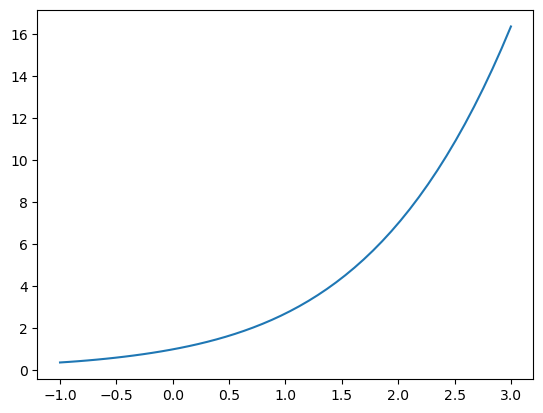

In [2]:
# 生成一个 4 阶多项式
p = poly.Polynomial(poly_coef_exp(4))

# 创建 x
x = np.linspace(-1, 3, 50)

# 使用多项式创建 y
y = p(x)

# 尝试作图
plt.plot(x, y)

In [3]:
def plot_poly_approx(n, x, poly_coef):
    '''
        一次性画出在 x=0 处逼近指数函数 f = exp(x) 不同阶的多项式
    '''
    
    for i in range(n):
        poly_coefficients = poly.Polynomial(poly_coef_exp(i))
        plt.plot(x, poly_coefficients(x), color='blue', alpha=0.1+0.8*i/n)
    
    return

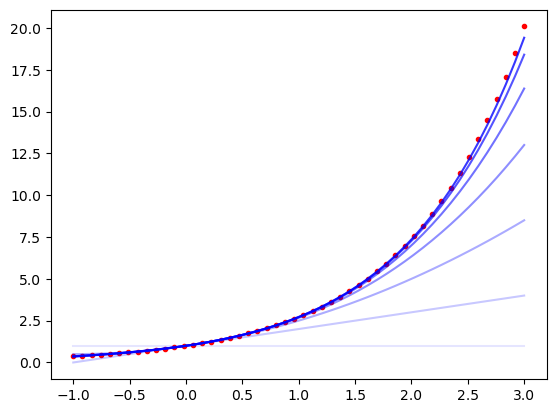

In [4]:
# "真实"的指数函数图像
plt.plot(x, np.exp(x), 'r.')
# 以不同阶多项式逼近的函数图像
plot_poly_approx(7, x, poly_coef_exp)

#### 线性插值

考虑多项式的次数 $n=1$ 的简单情形. 

<img src="./assets/d1poly.png" width="360" style="display: block;margin-left: auto;margin-right: auto;" />

我们试着确定一个通过两个互异的节点 $(x_0,y_0)$ 和 $(x_1,y_1)$ 的一次多项式（因而是线性的），用它来逼近函数 $f$，使其满足 $f(x_0)=y_0$和$f(x_1)=y_1$. 

定义函数 $${\color{red}{L_0(x)}}=\frac{x-x_1}{x_0-x_1}\;\text{和}\;{\color{blue}{L_1(x)}}=\frac{x-x_0}{x_1-x_0}$$

例如

<img src="./assets/d1poly_basis.png" width="640" style="display: block;margin-left: auto;margin-right: auto;" />

$${\color{red}{L_0(x)}}=\frac{x-5}{2-5}\quad {\color{blue}{L_1(x)}}=\frac{x-2}{5-2}$$

显然有 $$L_0(x_0)=1,\;L_0(x_1)=0,\;L_1(x_0)=0\;\text{和}\;L_1(x_1)=1$$

则通过 $(x_0,y_0)$ 和 $(x_1,y_1)$ 的一次多项式可以构建成 $$P(x)={\color{red}{L_0(x)}}f(x_0)+{\color{blue}{L_1(x)}}f(x_1)=\frac{x-x_1}{x_0-x_1}f(x_0)+\frac{x-x_0}{x_1-x_0}f(x_1)$$

我们看到，大多数插值法都是采用**基函数** (basis function) 的线性组合，即 $$P(x)=\sum_{k=0}^n c_k\phi_k(x)$$ 其中 $c_k$ 是插值系数或权重. 注意，基函数本身通常是非线性的.

对于前面的例子，权重分别是$c_0=4$和$c_1=1$，即 $$P(x)=4\cdot\frac{x-5}{2-5}+1\cdot\frac{x-2}{5-2}=-x+6$$

一般来说，对插值基函数的属性要求是各种插值法之间最基本的指定. 例如，线性插值仅要求分段线性，而样条插值则假定为分段多项式和全局平滑.

#### 抛物线插值

考虑多项式的次数 $n=2$ 的另一个简单情形. 

我们试着确定一个通过三个互异节点 $(x_0,y_0)$ 和 $(x_1,y_1)$ 和 $(x_2,y_2)$ 的二次多项式.

定义函数 $$L_0(x)=\frac{(x-x_1)(x-x_2)}{(x_0-x_1)(x_0-x_2)},\;L_1(x)=\frac{(x-x_0)(x-x_2)}{(x_1-x_0)(x_1-x_2)}\;\text{和}\;L_2(x)=\frac{(x-x_0)(x-x_1)}{(x_2-x_0)(x_2-x_1)}$$

显然有 $$\begin{align*}&L_0(x_0)=1,\;L_0(x_1)=0,\;L_0(x_2)=0,\\&L_1(x_0)=0,\;L_1(x_1)=1,\;L_1(x_2)=0,\\&L_2(x_0)=0,\;L_2(x_1)=0,\;L_2(x_2)=1
\end{align*}$$

则二次插值多项式可以构建成 $$P(x)=L_0(x)f(x_0)+L_1(x)f(x_1)+L_2(x)f(x_2)$$

二次多项式插值又叫抛物线插值.

#### Lagrange 插值公式

推广到通过 $(n+1)$ 个节点的 $n$ 次插值多项式 $P_n(x)$，构造的基函数 $L_{k}(x)$ 应满足：

$$\begin{equation*}
L_{k}(x_i) = \begin{cases}
        1\quad\text{当}\;i=k,
        \\
        0\quad\text{当}\;i\ne k.
        \end{cases}\quad i=0,1,\dots,n
\end{equation*}$$

因此，我们有 $$L_{k}(x)=\prod_{i=0,i\ne k}^n\frac{(x-x_i)}{(x_k-x_i)}=\frac{(x-x_0)(x-x_1)\dots(x-x_{k-1})(x-x_{k+1})\dots(x-x_{n})}{(x_k-x_0)(x_k-x_1)\dots(x_k-x_{k-1})(x_k-x_{k+1})\dots(x_k-x_{n})}$$

令 $$P(x)=\sum_{k=0}^nf(x_k)L_k(x)$$就得到了 $n$ 次 **Lagrange 插值多项式**.

> 【例 4.1】
>
> 零阶第一类 Bessel 函数 $J_0(x)$ 在若干点处的函数值如表所示
>
> |$x$|1.0|1.3|1.6|1.9|2.2|
> |--|--|--|--|--|--|
> |$J_0(x)$|0.7651977|0.6200860|0.4554022|0.2818186|0.1103623|  
>
> 分别用线性插值和抛物线插值求 $J_0(1.5)$ 的近似值

使用**线性插值**时，考虑到 1.5 位于 1.3 和 1.6 之间，因此取 $x_0=1.3$ 和 $x_1=1.6$，套用 Lagrange 插值公式，有 $$\begin{align*}
J_0(1.5)&\approx\frac{(1.5-1.6)}{(1.3-1.6)}\times 0.6200860+\frac{(1.5-1.3)}{(1.6-1.3)}\times 0.4554022 \\ &=0.5102968\end{align*}$$

使用**抛物线插值**时，如果所取节点靠近 $x=1.6$ 一侧，即 $x_0=1.3,x_1=1.6,x_2=1.9$，套用 Lagrange 插值公式，有 $$\begin{align*}
J_0(1.5)\approx&\frac{(1.5-1.6)(1.5-1.9)}{(1.3-1.6)(1.3-1.9)}\times 0.6200860+\frac{(1.5-1.3)(1.5-1.9)}{(1.6-1.3)(1.6-1.9)}\times 0.4554022+\frac{(1.5-1.3)(1.5-1.6)}{(1.9-1.3)(1.9-1.6)}\times 0.2818186 \\=&0.5112857\end{align*}$$

使用**抛物线插值**时，如果所取节点靠近 $x=1.3$ 一侧，即 $x_0=1.0,x_1=1.3,x_2=1.6$，套用 Lagrange 插值公式，有 $$\begin{align*}
J_0(1.5)\approx&\frac{(1.5-1.3)(1.5-1.6)}{(1.0-1.3)(1.0-1.6)}\times 0.7651977+\frac{(1.5-1.0)(1.5-1.6)}{(1.3-1.0)(1.3-1.6)}\times 0.6200860+\frac{(1.5-1.0)(1.5-1.3)}{(1.6-1.0)(1.6-1.3)}\times 0.4554022 \\=&0.5124715\end{align*}$$

#### 关于基函数

下面我们采用 Python 代码来演示前面的内容，请重点关注基函数的选择.

In [5]:
# 示例插值节点的 x 值
xvalues = [2, 5]
# 示例插值节点的 y 值
yvalues = [4, 1]

In [6]:
# 根据 Lagrange 基函数的计算公式
def lagrange_basis_at(x, i, xs):
    n = len(xs)
    assert i in range(n), '所给下标超出范围'
    
    p = 1
    for k in range(n):
        if k != i:
            print(f'k={k}, i={i}: ({x} - {xs[i]})/({xs[k]} - {xs[i]})')
            p *= (x - xs[k]) / (xs[i] - xs[k])
    return p

In [7]:
# 测试一下
lagrange_basis_at(2, 0, xvalues), lagrange_basis_at(5, 0, xvalues)

k=1, i=0: (2 - 2)/(5 - 2)
k=1, i=0: (5 - 2)/(5 - 2)


(1.0, -0.0)

In [8]:
lagrange_basis_at(2, 1, xvalues), lagrange_basis_at(5, 1, xvalues)

k=0, i=1: (2 - 5)/(2 - 5)
k=0, i=1: (5 - 5)/(2 - 5)


(0.0, 1.0)

In [9]:
# 定义 Lagrange 插值函数
def lagrange_interpolate_at(x, xs, ys):
    n = len(xs)
    
    s = 0
    for i in range(n):
        s += lagrange_basis_at(x, i, xs) * ys[i]
    return s

In [10]:
# 确保插值节点上的值等于函数值
lagrange_interpolate_at(5, xvalues, yvalues)

k=1, i=0: (5 - 2)/(5 - 2)
k=0, i=1: (5 - 5)/(2 - 5)


1.0

In [11]:
lagrange_interpolate_at(3, xvalues, yvalues)

k=1, i=0: (3 - 2)/(5 - 2)
k=0, i=1: (3 - 5)/(2 - 5)


3.0

接下来我们采用 Python 的函数式编程理念来改写前面的计算式子.

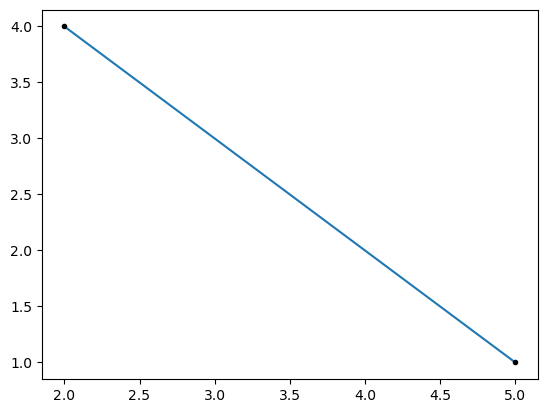

In [12]:
import operator
from functools import reduce
import numpy as np
import matplotlib.pyplot as plt

def lagrange_basis(xs, i):
    n = len(xs)
    assert i in range(n), '所给下标超出范围'
    def _basis(x):
        terms = [(x - xs[k]) / (xs[i] - xs[k]) for k in range(n) if k != i]
        return reduce(operator.mul, terms, 1)
    return _basis

def lagrange_interpolate(xs, ys):
    n = len(xs)
    assert len(xs) == len(ys), '所给节点长度不匹配'
    def _func(x):
        return sum(lagrange_basis(xs, i)(x) * ys[i] for i in range(n))
    return _func

# 示例插值节点的 x 值
xvalues = [2, 5]
# 示例插值节点的 y 值
yvalues = [4, 1]
ifunc = lagrange_interpolate(xvalues, yvalues)
xs = np.linspace(xvalues[0], xvalues[-1], 100)
ys = [ifunc(x) for x in xs]
plt.plot(xs, ys)
plt.plot(xvalues, yvalues, 'k.')
plt.show()

感受一下函数式编程的灵活性.

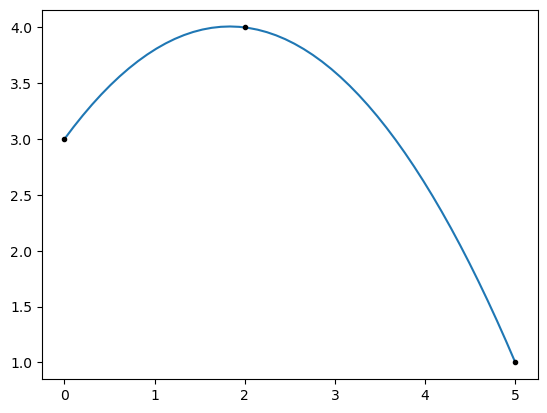

In [13]:
# 演示抛物线插值
# 示例插值节点的 x 值
xvalues = [0, 2, 5]
# 示例插值节点的 y 值
yvalues = [3, 4, 1]

xs = np.linspace(xvalues[0], xvalues[-1], 50)
ys = [lagrange_interpolate(xvalues, yvalues)(x) for x in xs]

plt.plot(xs, ys)
plt.plot(xvalues, yvalues, 'k.')
plt.show()

In [14]:
# 这一次，把画基函数的图包装成函数
def plot_bases(x, n=50):
    xs = np.linspace(x[0], x[-1], n)

    # 分别画出在 x_k 处的基函数
    for i in range(len(x)):
        plt.plot(xs, [lagrange_basis(xvalues, i)(j) for j in xs], label=f'L{i}')
    plt.legend()
    
    return

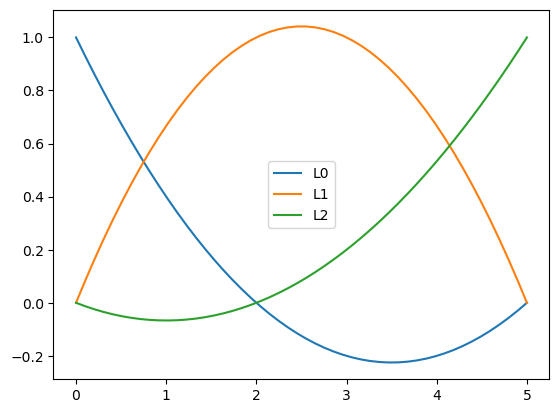

In [15]:
# 画出示例节点的抛物线插值用到的三个基函数
# 注意基函数取值为 0 和 1 的时候所对应的 x 的值
plot_bases(xvalues)

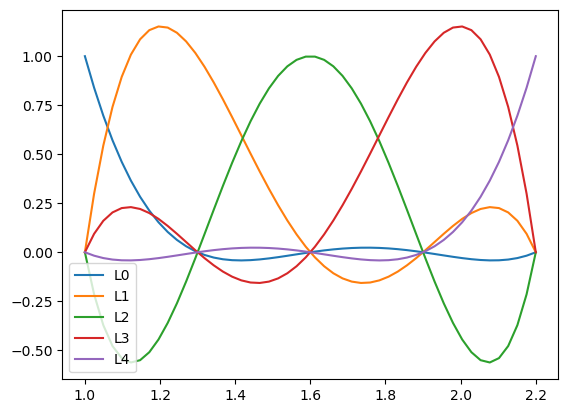

In [16]:
# 【例 4.1】的结果也可以用我们刚定义的函数来可视化

# 示例插值节点的 x 值
xvalues = [1.0, 1.3, 1.6, 1.9, 2.2]
# 示例插值节点的 y 值
yvalues = [0.7651977, 0.6200860, 0.4554022, 0.2818186, 0.1103623]

plot_bases(xvalues)

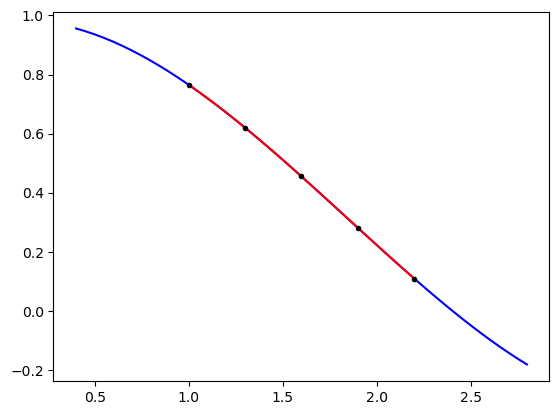

In [17]:
xs = np.linspace(xvalues[0], xvalues[-1], 50)
ys = [lagrange_interpolate(xvalues, yvalues)(x) for x in xs]

# 延拓到插值区间之外
r = abs(xvalues[-1] - xvalues[0]) * 0.5
xs_ext = np.linspace(xvalues[0] - r, xvalues[-1] + r, 50)
ys_ext = [lagrange_interpolate(xvalues, yvalues)(x) for x in xs_ext]

plt.plot(xs_ext, ys_ext, 'b-')
plt.plot(xs, ys, 'r-')
plt.plot(xvalues, yvalues, 'k.')

#### 更多讨论

从插值多项式 $$P(x)=\sum_{k=0}^n c_k\phi_k(x)$$ 得到的条件 $$P(x_i)=\sum_{k=0}^n c_k\phi_k(x_i)=y_i,\quad i=0,1,\dots,n$$ 它可以导出一个线性方程组 $\boldsymbol{A}\boldsymbol{c}=\boldsymbol{y}$，其中
$$\begin{equation*}
\boldsymbol{A}=\left[
\begin{array}{cccc}
\phi_0(x_0) & \phi_1(x_0) & \dots & \phi_n(x_0) \\
\phi_0(x_1) & \phi_1(x_1) & \dots & \phi_n(x_1) \\
\vdots & \vdots & \ddots & \vdots \\
\phi_0(x_n) & \phi_1(x_n) & \dots & \phi_n(x_n) \\
\end{array}\right],\;\boldsymbol{c}=\left[\begin{array}{c} c_0\\ c_1\\ \vdots \\ c_n\end{array}\right],\;\boldsymbol{y}=\left[\begin{array}{c} y_0\\ y_1\\ \vdots \\ y_n\end{array}\right]
\end{equation*}$$

对于这个线性方程组 $\boldsymbol{A}\boldsymbol{c}=\boldsymbol{y}$，如果 $\boldsymbol{A}=\boldsymbol{I}$（单位矩阵），那么需要
$$\begin{equation*}\phi_k(x)=L_{k}(x_i) = \begin{cases}
        1\quad\text{当}\;i=k,
        \\
        0\quad\text{当}\;i\ne k.
        \end{cases}\quad i=0,1,\dots,n
\end{equation*}$$

因此选定的 **Lagrange 基**具有如下形式 $$L_k(x)=\prod_{i=0, i\ne k}^n\frac{(x-x_i)}{(x_k-x_i)}$$

由于 $\boldsymbol{A}=\boldsymbol{I}$，简化了线性方程组的求解，易得插值系数 $c_k=y_k$. 插值多项式即为 $$P(x)=\sum_{k=0}^ny_kL_k(x)$$

#### 误差

假设 $x_0, x_1, \dots, x_n$ 是区间$[a, b]$中的不同数，$f\in C^{n+1}[a, b]$. 那么，对于$[a, b]$中的每一个$x$，在$x_0, x_1, \dots, x_n$之间存在一个数 $\xi(x)$（通常是未知的），有 $$f(x)=P(x)+\frac{f^{(n+1)}(\xi(x))}{(n+1)!}(x-x_0)(x-x_1)\dots(x-x_n)$$其中 $P(x)$ 是公式$$P(x)=\sum_{k=0}^nf(x_k)L_k(x)$$中给出的插值多项式.

> 记余项为 $$R_n(x)=f(x)-P(x)=\frac{f^{(n+1)}(\xi(x))}{(n+1)!}(x-x_0)(x-x_1)\dots(x-x_n)$$显然它在节点 $x_k$ 上为零. 于是有 $R_n(x)=K(x)(x-x_0)(x-x_1)\dots(x-x_n)$，式中 $K(x)$ 是待定函数.
>
> 将 $x$ 视为区间 $[a,b]$ 上的固定点，定义一个关于 $t$ 的函数 $g(t)$，它满足 $$g(t)=f(t)-P(t)-K(x)(t-x_0)(t-x_1)\dots(t-x_n)$$ 根据插值条件和余项的定义，可知 $g(t)$ 在点 $x_k\;(k=0,1,\dots,n)$及 $x$ 处均为零，因此 $g(t)$ 在 $[a,b]$ 上有 $(n+2)$ 个零点. 
>
> 根据广义 Rolle 定理，$g^{(n+1)}(t)$ 在 $(a,b)$ 内至少有一个零点，记做 $\xi$，即 $$g^{(n+1)}(\xi)=f^{(n+1)}(\xi)-P^{(n+1)}(\xi)-K(x)\frac{{\rm{d}}^{n+1}}{{\rm{d}}t^{n+1}}(t-x_0)(t-x_1)\dots(t-x_n)=0$$ 但是 $P(x)$ 是一个次数不超过 $n$ 的多项式，因此 $P^{(n+1)}(\xi)=0$. 又注意到 $(t-x_0)(t-x_1)\dots(t-x_n)$ 是 $(n+1)$ 次多项式，因此只有最高次项 $t^{n+1}$ 的 $(n+1)$ 阶导数保留，即 $\displaystyle\frac{{\rm{d}}^{n+1}}{{\rm{d}}t^{n+1}}(t-x_0)(t-x_1)\dots(t-x_n)=(n+1)!$
>
> 整理得 $$g^{(n+1)}(\xi)=f^{(n+1)}(\xi)-(n+1)!K(x)=0$$ 从中解出 $$K(x)=\frac{f^{(n+1)}(\xi(x))}{(n+1)!}$$

Lagrange 多项式的误差公式与 Taylor 多项式的误差公式非常相似. 

关于 $x_0$ 的 $n$ 次 Taylor 多项式集中了 $x_0$ 处的所有已知信息，其误差项的形式为 $$\frac{f^{(n+1)}(\xi(x))}{(n+1)!}(x-x_0)^{n+1}$$

$n$ 次 Lagrange 多项式使用不同数 $x_0, x_1, \dots, x_n$ 的信息，而不是 Taylor 多项式中的 $(x - x_0)^n$. 其误差公式使用 $n+1$ 项的乘积: $$\frac{f^{(n+1)}(\xi(x))}{(n+1)!}(x-x_0)(x-x_1)\dots(x-x_n)$$

### Newton 插值

#### 差商

Lagrange 插值公式可以看作直线方程“两点式”的推广. 如果从“点斜式”方程推广到 $(n+1)$ 个节点，则多项式可以表示成 $$P_n(x)=a_0 +a_1(x-x_0)+a_2(x-x_0)(x-x_1)+\dots+a_n(x-x_0)\dots(x-x_{n-1})$$ 其中 $a_0,a_1,\dots,a_n$ 是待定系数. 

对于多项式 $$P_n(x)=a_0 +a_1(x-x_0)+a_2(x-x_0)(x-x_1)+\dots+a_n(x-x_0)\dots(x-x_{n-1})$$

当 $x=x_0$ 时，有 $$a_0=P_n(x_0)=f(x_0)$$

当 $x=x_1$ 时，并且代入$a_0=f(x_0)$，有$f(x_0)+a_1(x_1-x_0)=P_n(x_1)=f(x_1)$ 从而有 $$a_1=\frac{f(x_1)-f(x_0)}{x_1-x_0}$$

引进差商的定义：

> 函数 $f$ 关于 $x_i$ 的**零阶差商** (zeroth divided difference) 表示为 $f[x_i]$，此即 $f$ 在 $x_i$ 的值：$$f[x_i]=f(x_i)$$
> 
> 递归地，$f$ 关于 $x_i$和 $x_{i+1}$ 的**一阶差商** (first divided difference) 表示为 $f[x_i, x_{i+1}]$，定义为 $$f[x_i, x_{i+1}]=\frac{f[x_{i+1}]-f[x_i]}{x_{i+1}-x_i}$$
> 
> $k$ 阶差商定义为 $$f[x_i,x_{i+1},\dots,x_{i+k-1},x_{i+k}]=\frac{f[x_{i+1},\dots,x_{i+k-1},x_{i+k}]-f[x_i,x_{i+1},\dots,x_{i+k-1}]}{x_{i+k}-x_i}$$

根据差商的定义，代入“点斜式”直线方程，容易发现，系数 $a_k$ 满足 $$a_k=f[x_0,x_1,x_2,\dots,x_k]\quad k=0,1,,\dots,n$$ 因此，$P_n(x)$ 改写为 Newton 差商形式 $$P_n(x)=f[x_0]+\sum_{k=1}^nf[x_0,x_1,\dots,x_k](x-x_0)\dots(x-x_{k-1})$$

差商 $f[x_0,x_1,\dots,x_k]$ 的值与数 $x_0,x_1,\dots,x_k$ 的顺序无关.

根据定义，我们可以列出所谓的“差商计算表”：

| $$x$$ | $$f(x)$$ | 一阶差商 | 二阶差商 | 三阶差商 |
|--|--|--|--|--|
| $$x_0$$ | $$f[x_0]$$ ||||
||| $$f[x_0,x_1]=\frac{f[x_1]-f[x_0]}{x_1-x_0}$$ ||
| $$x_1$$ | $$f[x_1]$$ || $$f[x_0,x_1,x_2]=\frac{f[x_1,x_2]-f[x_0,x_1]}{x_2-x_0}$$ ||
||| $$f[x_1,x_2]=\frac{f[x_2]-f[x_1]}{x_2-x_1}$$ || $$f[x_0,x_1,x_2,x_3]=\frac{f[x_1,x_2,x_3]-f[x_0,x_1,x_2]}{x_3-x_0}$$ |
| $$x_2$$ | $$f[x_2]$$ || $$f[x_1,x_2,x_3]=\frac{f[x_2,x_3]-f[x_1,x_2]}{x_3-x_1}$$ ||
||| $$f[x_2,x_3]=\frac{f[x_3]-f[x_2]}{x_3-x_2}$$ || $$f[x_1,x_2,x_3,x_4]=\frac{f[x_2,x_3,x_4]-f[x_1,x_2,x_3]}{x_4-x_1}$$ |
| $$x_3$$ | $$f[x_3]$$ || $$f[x_2,x_3,x_4]=\frac{f[x_3,x_4]-f[x_2,x_3]}{x_4-x_2}$$ ||
||| $$f[x_3,x_4]=\frac{f[x_4]-f[x_3]}{x_4-x_3}$$ || $$f[x_2,x_3,x_4,x_5]=\frac{f[x_3,x_4,x_5]-f[x_2,x_3,x_4]}{x_5-x_2}$$ |
| $$x_4$$ | $$f[x_4]$$ || $$f[x_3,x_4,x_5]=\frac{f[x_4,x_5]-f[x_3,x_4]}{x_5-x_3}$$ ||
||| $$f[x_4,x_5]=\frac{f[x_5]-f[x_4]}{x_5-x_4}$$ ||| 
| $$x_5$$ | $$f[x_5]$$ ||||

#### 等距差商

如果插值节点是等距的，Newton 差商公式可以化简. 

设**步长** (step) 为 $h=x_{i+1}-x_i\;(i=0,1,\dots,n-1)$，则根据等差序列的性质 $x=x_i+(s-i) h$，Newton 差商公式可以改写为 
$$\begin{align*}
P_n(x)&=P_n(x_0+sh)=f[x_0]+shf[x_0,x_1]+s(s-1)h^2f[x_0,x_1,x_2]\\&+\dots+s(s-1)\dots(s-n+1)h^nf[x_0,x_1,\dots,x_n]\\
&=f[x_0]+\sum_{k=1}^ns(s-1)\dots(s-k+1)h^kf[x_0,x_1,\dots,x_k]\\
&=f[x_0]+\sum_{k=1}^n\begin{pmatrix}s\\k\end{pmatrix}k!h^kf[x_0,x_1,\dots,x_k]
\end{align*}$$

我们定义向前差分

> 给定一个函数 $f(x)$. 定义**向前差分** (forward difference) $\Delta f_k$ 如下 $$\Delta f_k=f(x_k+h)-f(x_k)=f_{k+1}-f_k,\quad k\ge 0$$高阶向前差分递归定义为 $$\Delta^n f_k = \Delta(\Delta^{n-1}f_k),\quad n\ge 2$$我们规定$$\Delta^0 f=f$$

利用这个定义易得 $f[x_0,x_1,\dots,x_n]=\displaystyle\frac{1}{k!h^k}\Delta^kf(x_0)$，Newton 向前差分公式化简为 $$P_n(x)=f(x_0)+\sum_{k=1}^n\begin{pmatrix}s\\k\end{pmatrix}\Delta^kf(x_0)+\begin{pmatrix}s\\n+1\end{pmatrix}h^{n+1}f^{(n+1)}(\xi),\quad x_0<\xi<x_n$$

类似地，定义向后差分

> 给定一个函数 $f(x)$. 定义**向后差分** (backward difference) $\nabla f_k$ 如下 $$\nabla f_k=f(x_k)-f(x_k-h)=f_k-f_{k-1},\quad k\ge 1$$高阶向后差分递归定义为 $$\nabla^n f_k = \nabla(\nabla^{n-1}f_k),\quad n\ge 2$$我们规定$$\nabla^0 f=f$$

重排等距插值节点，Newton 插值公式可以改写为
$$\begin{align*}
P_n(x)&=f[x_n]+f[x_n,x_{n-1}](x-x_n)+f[x_n,x_{n-1},x_{n-2}](x-x_n)(x-x_{n-1})\\
&+\dots+f[x_n,x_{n-1}\dots,x_0](x-x_n)(x-x_{n-1})\dots(x-x_1)\\
&=f[x_n]+shf[x_n,x_{n-1}]+s(s+1)h^2f[x_n,x_{n-1},x_{n-2}]\\
&+\dots+s(s+1)\dots(s+n-1)h^nf[x_n,\dots,x_0]
\end{align*}$$

利用向后差分定义易得 $f[x_n,x_{n-1},\dots,x_{n-k}]=\displaystyle\frac{1}{k!h^k}\nabla^kf(x_n)$，并使用实数域的广义二项式系数记号，即 $$\begin{pmatrix}-s\\k\end{pmatrix}=(-1)^k\displaystyle\frac{s(s+1)\dots(s+k-1)}{k!}$$ 则 Newton 向后差分公式化简为
$$P_n(x)=f(x_n)+\sum_{k=1}^n(-1)^k\begin{pmatrix}-s\\k\end{pmatrix}\nabla^kf(x_n)+(-1)^{n+1}\begin{pmatrix}-s\\n+1\end{pmatrix}h^{n+1}f^{(n+1)}(\xi),\quad x_0<\xi<x_n$$

最后，还可以定义中心差分

> 给定一个函数 $f(x)$. 定义**中心差分** (centered difference) $\delta f_k$如下 $$\delta f_k=f(x_k+\frac{h}{2})-f(x_k-\frac{h}{2})=f_{k+\frac{1}{2}}-f_{k-\frac{1}{2}},\quad k \ge 1$$高阶中心差分递归定义为 $$\delta^n f_k=\delta (\delta^{n-1}f_k),\quad n\ge 2$$我们规定$$\delta^0 f=f$$

> 【例 4.2】
>
> 确定下表中的未知项
> | $$x$$ | $$f(x)$$ | 一阶差商 | 二阶差商 |
> |--|--|--|--|
> | $$x_0=0.0$$ | $$f[x_0]$$ |||
> ||| $$f[x_0,x_1]$$ ||
> | $$x_1=0.4$$ | $$f[x_1]$$ || $$f[x_0,x_1,x_2]=\displaystyle\frac{50}{7}$$ |
> ||| $$f[x_1,x_2]=10$$ ||
> | $$x_2=0.7$$ | $$f[x_2]=6$$ |||

In [18]:
def coef_divided_difference(xs, ys):
    assert len(xs) == len(ys), '所给节点长度不匹配'
    n = len(xs)
    
    f = [[y] + [np.nan] * (n - 1) for y in ys]
    
    for i in range(1, n):
        for j in range(1, i + 1):
            f[i][j] = (f[i][j-1] - f[i-1][j-1]) / (xs[i] - xs[i-j])
    
    return f

def print_2d(array):
    for row in array:
        for col in row:
            print(f'{col:12.7f}', end=' ')
        print('')

In [19]:
# 示例插值节点的 x 值
xvalues = [1.0, 1.3, 1.6, 1.9, 2.2]
# 示例插值节点的 y 值
yvalues = [0.7651977, 0.6200860, 0.4554022, 0.2818186, 0.1103623]

table = coef_divided_difference(xvalues, yvalues)

print_2d(table)

   0.7651977          nan          nan          nan          nan 
   0.6200860   -0.4837057          nan          nan          nan 
   0.4554022   -0.5489460   -0.1087339          nan          nan 
   0.2818186   -0.5786120   -0.0494433    0.0658784          nan 
   0.1103623   -0.5715210    0.0118183    0.0680685    0.0018251 


In [20]:
def newton_polynomial_at(x, xs, ys):
    '''
        在点 x 计算 Newton 多项式逼近
    '''
    
    def _divided_difference(xs, ys):
        assert len(xs) == len(ys), '所给节点长度不匹配'
        n = len(xs)
        
        f = np.zeros((n, n))
        f[:,0] = ys

        for i in range(1, n):
            for j in range(1, i + 1):
                f[i,j] = (f[i,j-1] - f[i-1,j-1]) / (xs[i] - xs[i-j])

        return f
    
    coef = _divided_difference(xs, ys)
    print(coef)
    
    total = coef[0, 0]
    for i in range(1, len(xs)):
        prod = coef[i, i]
        for j in range(i):
            prod *= (x - xs[j])
        total += prod

    return total

In [21]:
p4 = newton_polynomial_at(1.5, xvalues, yvalues)

print(f'{p4:.7f}')

[[ 0.7651977   0.          0.          0.          0.        ]
 [ 0.620086   -0.48370567  0.          0.          0.        ]
 [ 0.4554022  -0.548946   -0.10873389  0.          0.        ]
 [ 0.2818186  -0.578612   -0.04944333  0.0658784   0.        ]
 [ 0.1103623  -0.571521    0.01181833  0.06806852  0.0018251 ]]
0.5118200


### Hermite 插值

#### 密切插值

Lagrange 插值允许计算次数小于 $n$ 的多项式，它在给定的互异插值点取与给定函数相同的值. 

实际问题中，有时不仅要求插值多项式和给定函数在节点 $x_0,x_1,\dots,x_n$ 上的函数值相等，在节点处的若干阶导数也要求相等，即已知

$$
\begin{matrix}
(x_0,f(x_0)) & (x_1,f(x_1)) & \dots & (x_{n},f(x_{n})) \\
(x_0,f^\prime(x_0)) & (x_1,f^\prime(x_1)) & \dots & (x_{n},f^\prime(x_{n})) \\
\vdots & \vdots & \ddots & \vdots \\
(x_0,f^{(m)}(x_0)) & (x_1,f^{(m)}(x_1)) & \dots & (x_{n},f^{(m)}(x_{n}))
\end{matrix}
$$

> 令 $x_0,x_1,\dots,x_n$ 是区间 $[a,b]$ 上的 $n+1$ 个不同的点. 对每个 $i=0,1,\dots,n$，$m_i$是一个非负整数. 记 $m=\max_{0\le i\le n}m_i$，并假设 $f\in C^m[a,b]$. 满足 $$\frac{{\rm{d}}^kP(x_i)}{{\rm{d}}x^k}=\frac{{\rm{d}}^kf(x_i)}{{\rm{d}}x^k},\quad \text{对每个}i=0,1,\dots,n\;\text{和}\; k=0,1,\dots,m_i$$的次数最小的多项式 $P(x)$称为逼近函数 $f$ 的**密切多项式** (osculating polynomial).

- 当 $n=0$ 时，密切多项式是 $f$ 在 $x_0$ 处的 $m_0$ 次 **Taylor 多项式**
- 对每个 $i$，当 $m_i=0$ 时，密切多项式是 $f$ 在 $x_0,x_1,\dots,x_n$ 处的 $n$ 次 **Lagrange 插值多项式**.

#### Hermite 插值

Hermite 插值需要找到在点 $x_0, x_1, \dots, x_n$ 处与 $f$ 函数值相同，并且一阶导数值与 $f$ 的一阶导数值也相同的次数最小的多项式$P(x)$. 如果这个多项式存在，则称为 Hermite 插值多项式，或简称 Hermite 多项式.

对每个 $i=0,1,\dots,n$，当 $m_i=1$ 时，就是 **Hermite 插值多项式**.

基于在点 $x_0, x_1, \dots, x_n$ 处的 Newton 差商公式，即 $$P_n(x)=f[x_0]+\sum_{k=1}^nf[x_0,x_1,\dots,x_n](x-x_0)\dots(x-x_{k-1})$$ 可以求得 Hermite 多项式.

定义序列 $z_0, z_1,\dots, z_{2n+1}$ 且对每个 $i=0,1,\dots,n$ 定义 $z_{2i}=z_{2i+1}=x_i$. 用这个序列构造差商表. 利用差商和导数的关系，我们有如下定理：

假设 $f\in C^n[a,b]$，$x_0,x_1,\dots,x_n$ 是 $[a,b]$ 内的不同的数，则在 $(a,b)$ 内存在一个数 $\xi$，使下式成立 $$f[x_0,x_1,\dots,x_n]=\frac{f^{(n)}(\xi)}{n!}$$

> 令 $g(x)=f(x)-P_n(x)$，根据插值多项式条件，函数 $g$ 在 $[a,b]$ 内有 $n+1$ 个不同的零点. 由广义 Rolle 定理可知，在 $(a,b)$ 内存在一个数 $\xi$ 使得 $g^{(n)}(\xi)=0$ 即 $$0=f^{(n)}(\xi)-P_n^{(n)}(\xi)$$ 又 $P_n(x)$ 是一个 $n$ 次多项式，其首项系数是$f[x_0,x_1,\dots,x_n]$，所以对所有的 $x$ 有 $$P_n^{(n)}(x)=n!f[x_0,x_1,\dots,x_n]$$从而 $$f[x_0,x_1,\dots,x_n]=\frac{f^{(n)}(\xi)}{n!}$$

|$$z$$ | $$f(z)$$ | 一阶差商 | 二阶差商 |
|--|--|--|--|
|$$z_0=x_0$$ | $$f[z_0]=f(x_0)$$ |||
||| $$f[z_0,z_1]=f^\prime(x_0)$$ || 
|$$z_1=x_0$$ | $$f[z_1]=f(x_0)$$ || $$f[z_0,z_1,z_2]=\frac{f[z_1,z_2]-f[z_0,z_1]}{z_2-z_0}$$ | 
||| $$f[z_1,z_2]=\frac{f[z_2]-f[z_1]}{z_2-z_1}$$ ||
|$$z_2=x_1$$ | $$f[z_2]=f(x_1)$$ || $$f[z_1,z_2,z_3]=\frac{f[z_2,z_3]-f[z_1,z_2]}{z_3-z_1}$$ |
||| $$f[z_2,z_3]=f^\prime(x_1)$$ || 
|$$z_3=x_1$$ | $$f[z_3]=f(x_1)$$ || $$f[z_2,z_3,z_4]=\frac{f[z_3,z_4]-f[z_2,z_3]}{z_4-z_2}$$ |
||| $$f[z_3,z_4]=\frac{f[z_4]-f[z_3]}{z_4-z_3}$$ ||
|$$z_4=x_2$$ | $$f[z_4]=f(x_2)$$ || $$f[z_3,z_4,z_5]=\frac{f[z_4,z_5]-f[z_3,z_4]}{z_5-z_3}$$ |
||| $$f[z_3,z_4]=f^\prime(x_2)$$ || 
|$$z_5=x_2$$ | $$f[z_4]=f(x_2)$$ |||

使用 Newton 差商表示的 Hermite 插值公式

$$\begin{align*}
H(x)&=Q_{0,0}+Q_{1,1}(x-x_0)+Q_{2,2}(x-x_0)^2+Q_{3,3}(x-x_0)^2(x-x_1)\\
&+Q_{4,4}(x-x_0)^2(x-x_1)^2+\dots\\
&+Q_{2n+1,2n+1}(x-x_0)^2(x-x_1)^2\dots(x-x_{n-1})^2(x-x_n)
\end{align*}$$

Python 实现如下

In [22]:
def hermite_polynomial_at(x, xs, ys, yps):
    '''
        在点 x 计算 Hermite 多项式逼近
    '''
    
    def _divided_difference(xs, ys, yps):
        assert len({len(i) for i in [xs, ys, yps]}) == 1, '所给节点长度不匹配'
        n = len(xs)
        
        q = np.zeros((2*n, 2*n))
        z = np.zeros(2*n)
        
        for i in range(n):
            z[2*i] = z[2*i+1] = xs[i]
            q[2*i,0] = q[2*i+1,0] = ys[i]
            q[2*i+1,1] = yps[i]
            if i != 0:
                q[2*i,1] = (q[2*i,0] - q[2*i-1,0]) / (z[2*i] - z[2*i-1])
        
        for i in range(2, 2 * n):
            for j in range(2, i+1):
                q[i,j] = (q[i,j-1] - q[i-1,j-1]) / (z[i] - z[i-j])
        
        return q
    
    coef = _divided_difference(xs, ys, yps)
    print(coef)
    
    total = coef[0, 0]
    for i in range(1, len(xs) * 2):
        prod = coef[i][i]
        for j in range(i):
            prod *= (x - xs[j//2])
        total += prod

    return total

In [23]:
# 示例插值节点的 x 值
xvalues = [1.3, 1.6, 1.9]
# 示例插值节点的 y 值
yvalues = [0.6200860, 0.4554022, 0.2818186]
# 示例插值节点的 yp 值
ypvalues = [-0.5220232, -0.5698959, -0.5811571]

h5 = hermite_polynomial_at(1.5, xvalues, yvalues, ypvalues)

print(f'{h5:.7f}')

[[ 0.620086    0.          0.          0.          0.          0.        ]
 [ 0.620086   -0.5220232   0.          0.          0.          0.        ]
 [ 0.4554022  -0.548946   -0.08974267  0.          0.          0.        ]
 [ 0.4554022  -0.5698959  -0.069833    0.06636556  0.          0.        ]
 [ 0.2818186  -0.578612   -0.02905367  0.06796556  0.00266667  0.        ]
 [ 0.2818186  -0.5811571  -0.00848367  0.06856667  0.00100185 -0.00277469]]
0.5118277


### 三次样条插值

#### 分段多项式逼近

尽管单个多项式可以逼近任意函数，但是高次多项式会引起剧烈振荡，因此需要寻找替代方法. **分段多项式逼近** (piecewise-polynomial approximation) 就是一个比较流行的方法.

“分段”是指，把插值区间划分为若干个子区间，在每个子区间上依次使用插值法.

最简单的分段多项式逼近是分段线性插值，其函数图像为使用一系列线段依次连接各插值节点. 

分段线性插值会造成节点处可能失去可微性. 从几何角度看，表现为“不光滑”. 

<img src="./assets/piecewise.png" width="600" style="display: block;margin-left: auto;margin-right: auto;" />

由于 Hermite 插值对节点处的导数有要求，可以考虑用分段三次 Hermite 插值. 这种插值能够产生连续的导数. 然而，需要**提前知道函数的导数值**，这在实际问题中非常困难.

#### 三次样条插值

我们转而考虑在每两个节点之间使用三次多项式.

<img src="./assets/spline.png" width="600" style="display: block;margin-left: auto;margin-right: auto;" />

这就产生了分段三次样条插值算法. “样条”是一种传统制图工具.

<img src="./assets/spline_tool.png" width="240" style="display: block;margin-left: auto;margin-right: auto;" />

给定一个定义在 $[a,b]$ 上的函数 $f$ 和一组节点 $a = x_0 < x_1 < \dots < x_n = b$，$f$ 的**三次样条插值** (cubic spline interpolant) $S$是一个满足以下条件的函数：

- 对每个$j = 0, 1, \dots, n - 1$，$S(x)$ 在子区间$[x_j,x_{j+1}]$上是一个三次多项式，记为$S_j(x)$，
- 对每个$j = 0, 1, \dots, n - 1$，$S_j(x_j)=f(x_j)$ 且 $S_j(x_{j+1})=f(x_{j+1})$
- 对每个$j = 0, 1, \dots, n - 2$，$S_{j+1}(x_{j+1}) = S_j(x_{j+1})$
- 对每个$j = 0, 1, \dots, n - 2$，$S^\prime_{j+1} (x_{j+1})=S^\prime_j(x_{j+1})$
- 对每个$j = 0, 1, \dots, n - 2$，$S^{\prime\prime}_{j+1}(x_{j+1})=S^{\prime\prime}_j(x_{j+1})$
- 满足以下**边界条件** (boundary condition) 中的其中之一
  - 自然边界：$S^{\prime\prime}(a)=S^{\prime\prime}(b)=0$
  - 夹持边界：$S^\prime(a)=f^\prime(a)$ 且$S^\prime(b)=f^\prime(b)$
  
> 【例 4.3】
>
> 构造一个通过点 $(1,2)$、$(2,3)$ 和 $(3,5)$ 的三次样条

共有两个子区间. 即

$$\begin{align*}
S_0(x)=a_0 + b_0(x-1) + c_0(x-1)^2 + d_0(x-1)^3,\quad x \in [1,2]\\
S_1(x)=a_1 + b_1(x-2) + c_1(x-2)^2 + d_1(x-2)^3,\quad x \in [2,3]
\end{align*}$$

有 8 个待定系数，需要 8 个条件才能解出. 下面寻找条件.

插值节点上的函数值相等，可以导出 4 个条件：

$$\begin{align*}
&a_0=f(1)=2,\quad a_0+b_0+c_0+d_0=f(2)=3,\\
&a_1=f(2)=3,\quad a_1+b_1+c_1+d_1=f(3)=5
\end{align*}$$

内部节点上导数相等，可以导出 2 个条件：

$$\begin{align*}
&S^\prime_0(2)=S^\prime_1(2): b_0+2c_0+3d_0=b_1,\\
&S^{\prime\prime}_0(2)=S^{\prime\prime}_1(2): 2c_0+6d_0=2c_1
\end{align*}$$

自然边界，可以导出 2 个条件：

$$\begin{align*}
S^{\prime\prime}_0(1)=0: 2c_0=0,\quad S^{\prime\prime}_1(3)=0: 2c_1+6d_1=0
\end{align*}$$

求解方程组，得到三次样条的函数式为

$$ S(x)=\begin{cases}\displaystyle\frac{1}{4}\left({8+3(x-1)+(x-1)^3}\right),\quad &x \in [1,2]\\ \\
\displaystyle\frac{1}{4}\left({12+6(x-2)+3(x-2)^2-(x-2)^3}\right),\quad &x \in [2,3]
\end{cases}$$

我们回顾三次样条插值函数 $$S(x)=\begin{cases}S_0(x),\quad &x\in [x_0,x_1]\\S_1(x),\quad &x\in [x_1,x_2]\\\dots\\S_{n-1}(x),\quad &x\in [x_{n-1},x_{n}]\end{cases}$$ 的条件，它在区间 $[a,b]$ 上给定节点 $a=x_0<x_1<\dots<x_n=b$ 上有 $S(x_j)=f(x_j)$

根据三次样条的定义可知，$S(x)$ 的二阶导数在子区间 $[x_j,x_{j+1}]\;(j=0,1,\dots,n-1)$ 上是线性函数. 以 Lagrange 基函数构造 $S^{\prime\prime}(x)$ 在子区间的插值 $$S^{\prime\prime}(x)=S^{\prime\prime}(x_j)\frac{x-x_{j+1}}{x_{j}-x_{j+1}}+S^{\prime\prime}(x_{j+1})\frac{x-x_{j}}{x_{j+1}-x_{j}},\quad x\in[x_{j},x_{j+1}]$$

记 $m_j=S^{\prime\prime}(x_j)$ 以及 $h_j=x_{j+1}-x_{j}$，上式改写成 $$S^{\prime\prime}(x)=m_j\frac{x_{j+1}-x}{h_j}+m_{j+1}\frac{x-x_{j}}{h_j},\quad x\in[x_{j},x_{j+1}]$$

对 $S^{\prime\prime}(x)$ 积分两次，得到

$$\begin{align*}
&S^\prime(x)=-m_j\frac{(x_{j+1}-x)^2}{2h_j}+m_{j+1}\frac{(x-x_j)^2}{2h_j} + A_j\\
&S(x)=m_j\frac{(x_{j+1}-x)^3}{6h_j}+m_{j+1}\frac{(x-x_j)^3}{6h_j} + A_j(x-x_j)+B_j
\end{align*}$$

其中 $A_j,B_j$ 是积分常数，容易从条件 $S(x_j)=f(x_j)\overset{\Delta}{=}f_j$ 确定 $$A_j=\frac{f_{j+1}-f_j}{h_j}-\frac{h_j}{6}(m_{j+1}-m_j),\quad B_j=f_j-m_j\frac{h_j^2}{6}$$

因此，我们有

$$\begin{align*}
S^\prime(x)=&\frac{1}{2h_j}\left[-m_j(x_{j+1}-x)^2+m_{j+1}(x-x_j)^2\right]+f[x_j,x_{j+1}]-\frac{h_j}{6}(m_{j+1}-m_j)\\
S(x)=&\frac{1}{6h_j}\left[m_j(x_{j+1}-x)^3+m_{j+1}(x-x_i)^3\right]+f[x_j,x_{j+1}](x-x_j)+f_j-\frac{h_j^2}{6}\left[\frac{(m_{j+1}-m_j)(x-x_j)}{h_j}+m_j\right]
\end{align*}$$

考虑在 $x_j$ 上的导数连续性，即 $S_{j-1}^\prime(x_j^-)=S_{j}^\prime(x_j^+)$，其中$j=1,\dots,n-1$.

因为

$$\begin{align*}
\lim_{x\to x_j^-}S_{j-1}^\prime(x)&=\frac{1}{2h_{j-1}}\left[-m_{j-1}(x_{j}-x)^2+m_{j}(x-x_{j-1})^2\right]+f[x_{j-1},x_{j}]-\frac{h_{j-1}}{6}(m_{j}-m_{j-1})\\&=\frac{1}{3}m_jh_{j-1}+\frac{1}{6}m_{j-1}h_{j-1}+f[x_{j-1},x_{j}]\\
\lim_{x\to x_j^+}S_{j}^\prime(x)&=\frac{1}{2h_j}\left[-m_j(x_{j+1}-x)^2+m_{j+1}(x-x_j)^2\right]+f[x_j,x_{j+1}]-\frac{h_j}{6}(m_{j+1}-m_j)\\&=-\frac{1}{3}m_jh_j-\frac{1}{6}m_{j+1}h_j+f[x_j,x_{j+1}]
\end{align*}$$

所以有 $$\frac{1}{3}m_jh_{j-1}+\frac{1}{6}m_{j-1}h_{j-1}+f[x_{j-1},x_{j}]=-\frac{1}{3}m_jh_j-\frac{1}{6}m_{j+1}h_j+f[x_j,x_{j+1}]$$

化简得 $$h_{j-1}m_{j-1}+2(h_{j-1}+h_j)m_j+h_jm_{j+1}=6d_j,\quad j=1,\dots,n-1$$
其中 $d_j=f[x_j,x_{j+1}]-f[x_{j-1},x_j]$.

这是一个关于 $(n+1)$ 个未知量 $m_0,m_1,\dots,m_n$ 的线性方程组. 但是方程个数只有 $(n-1)$ 个，还需要补充边界条件. 边界条件可以应用在区间 $[a,b]$ 的端点处.

#### 边界条件

对于自然边界：$S^{\prime\prime}(a)=S^{\prime\prime}(b)=0$，则有

$$\begin{align*}
&m_0=f^{\prime\prime}(a)=0\\
&m_n=f^{\prime\prime}(b)=0
\end{align*}$$

$$\begin{equation*}
\begin{bmatrix}
1 & 0 & 0 & \dots & & & 0 \\
h_0 & 2(h_0+h_1) & h_1 & \dots & & & 0 \\
0 & h_1 & 2(h_1+h_2) & \dots & & & 0 \\
 & & & \ddots &  &  &  \\
0 & & & \dots & h_{n-2} & 2(h_{n-2} + h_{n-1})& h_{n-1} \\
0 & & & \dots & 0 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
m_0 \\ m_1 \\ m_2 \\ \vdots \\ m_{n-1} \\ m_n
\end{bmatrix}=
\begin{bmatrix}
0 \\ 6d_1 \\ 6d_2 \\ \vdots \\ 6d_{n-1} \\ 0
\end{bmatrix}
\end{equation*}$$

对于夹持边界：$S^\prime(a)=f^\prime(a)$ 且$S^\prime(b)=f^\prime(b)$，则有

$$\begin{align*}
&2h_0m_0+h_0m_1=6f[x_0,x_1]-6f^\prime(a)\\
&h_{n-1}m_{n-1}+2h_{n-1}m_n=6f^\prime(b)-6f[x_{n-1},x_{n}]
\end{align*}$$

$$\begin{equation*}
\begin{bmatrix}
2h_0 & h_0 & 0 & \dots & & & 0 \\
h_0 & 2(h_0+h_1) & h_1 & \dots & & & 0 \\
0 & h_1 & 2(h_1+h_2) & \dots & & & 0 \\
 & & & \ddots &  &  &  \\
0 & & & \dots & h_{n-2} & 2(h_{n-2} + h_{n-1})& h_{n-1} \\
0 & & & \dots & 0 & h_{n-1} & 2h_{n-1}
\end{bmatrix}
\begin{bmatrix}
m_0 \\ m_1 \\ m_2 \\ \vdots \\ m_{n-1} \\ m_n
\end{bmatrix}=
\begin{bmatrix}
6f[x_0,x_1]-6f^\prime(a) \\ 6d_1 \\ 6d_2 \\ \vdots \\ 6d_{n-1} \\ 6f^\prime(b)-6f[x_{n-1},x_{n}]
\end{bmatrix}
\end{equation*}$$

这里出现了**三对角矩阵** (tridiagonal matrix)，它是一类特殊的带状矩阵，除了主对角线、下对角线和上对角线的带状区域具有非零元素，其余区域均为 0. 形如

$$\begin{equation*}
\begin{bmatrix}
b_1 & c_1 &     & \dots & 0 \\
a_2 & b_2 & c_2 & \dots & 0 \\
0   & a_3 & b_3 & \dots & 0 \\
    &     &     & \ddots&   \\
0   &\dots&     & a_n   & b_n \\
\end{bmatrix}
\begin{bmatrix}
x_1 \\ x_2 \\ x_3 \\ \vdots \\ x_n
\end{bmatrix}=
\begin{bmatrix}
d_1 \\ d_2 \\ d_3 \\ \vdots \\ d_n
\end{bmatrix}
\end{equation*}$$

严格对角占优的矩阵可以用 $O(n)$ 时间复杂度的简化版 Gauss 消元法求解.

In [24]:
def thomas(a, b, c, d):
    '''
        求解三对角矩阵线性方程组的 Thomas 算法，即"追赶法"
    '''
    
    n = len(d)
    
    # 拷贝系数
    a, b, c, d = map(np.array, (a, b, c, d))
    # 未知向量
    x = np.empty(n)
    
    for i in range(1, n):
        m = a[i] / b[i-1]
        b[i] = b[i] - m * c[i-1] 
        d[i] = d[i] - m * d[i-1]
    
    
    x[-1] = d[-1] / b[-1]

    for i in range(n-2, -1, -1):
        x[i] = (d[i] - c[i] * x[i+1]) / b[i]

    return x

In [25]:
# 算例
a = [0, 1, 1, 1] # 下对角线
b = [2, 2, 2, 2] # 主对角线
c = [1, 1, 1, 0] # 上对角线

d = [1, 2, 3, 4] # 右端项

# 测试求解
thomas(a, b, c, d)

array([0., 1., 0., 2.])

In [26]:
# 构建三对角矩阵
tri_diag = np.diag(a[1:], -1) + np.diag(b, 0) + np.diag(c[:-1], 1)
print(tri_diag)

# 验证解
x = np.linalg.solve(tri_diag, d)
print(x)

tri_diag @ x

[[2 1 0 0]
 [1 2 1 0]
 [0 1 2 1]
 [0 0 1 2]]
[0. 1. 0. 2.]


array([1., 2., 3., 4.])

In [27]:
def cubic_spline(xs, ys):
    assert len(xs) == len(ys), '所给节点长度不匹配'
    n = len(xs)
    xs, ys = map(np.array, (xs, ys))
    
    h = [xs[i+1] - xs[i] for i in range(n-1)]
    f = [(ys[i+1] - ys[i]) / (xs[i+1] - xs[i]) for i in range(n-1)]
    
    a = [0] + h[:-1] + [0]
    b = [1] + [2 * h[i] + 2 * h[i+1] for i in range(len(h)-1)] + [1]
    c = [0] + h[1:] + [0]
    
    d = [0] + [6*f[i] - 6*f[i-1] for i in range(1, len(f))] + [0]
    
    m = thomas(a, b, c, d)
    
    s = [lambda x, i=j: (m[i]*(xs[i+1]-x)**3 + m[i+1]*(x-xs[i])**3)/6/h[i]+
         f[i]*(x-xs[i]) + ys[i] - h[i]*(m[i+1]-m[i])*(x-xs[i])/6-m[i]*h[i]*h[i]/6 
         for j in range(n-1)]
    
    return s

In [28]:
# 示例插值节点的 x 值
xvalues = [1.0, 1.3, 1.6, 1.9, 2.2]
# 示例插值节点的 y 值
yvalues = [0.7651977, 0.6200860, 0.4554022, 0.2818186, 0.1103623]

cubic_spline(xvalues, yvalues)[2](1.6)

0.4554022

In [29]:
def plot_spline(f, xs, ys):
    assert len(xs) == len(ys), '所给节点长度不匹配'
    n = len(xs)
    s = f(xs, ys)
    f, ax = plt.subplots()
    for i in range(n-1):
        x = np.linspace(xs[i], xs[i+1], 50)
        y = [s[i](j) for j in x]
        
        ax.plot(x, y, 'r-')
        ax.plot(xs[i], ys[i], 'k.')
    
    ax.plot(xs[-1], ys[-1], 'k.')
    
    return f, ax

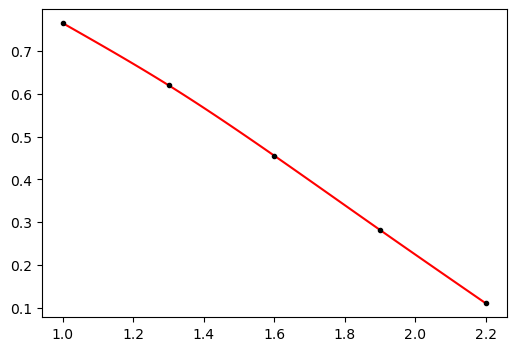

In [30]:
f, _ = plot_spline(cubic_spline, xvalues, yvalues)

f.set_size_inches(6, 4)

In [31]:
# 肉眼描点得到的保时捷 911 的数据
data = [
    [ 0.0, 0.0],
    [ 3.5, 2.0],
    [ 5.9, 3.1],
    [13.2, 4.2],
    [15.4, 5.0],
    [20.9, 7.6],
    [24.5, 8.3],
    [31.3, 7.8],
    [42.2, 4.8],
    [45.8, 3.4],
    [46.5, 2.2]
]

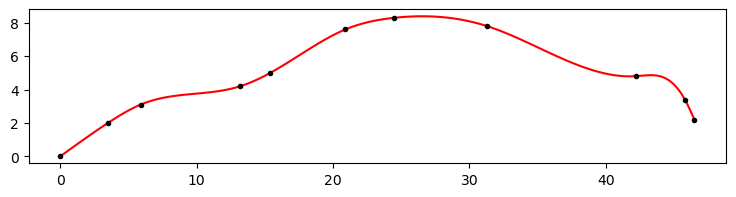

In [32]:
xvalues, yvalues = zip(*data)

f, _ = plot_spline(cubic_spline, xvalues, yvalues)

f.set_size_inches(9, 2)

### Runge 现象演示

In [33]:
def newton_polynomial(xs, ys):
    '''
        计算 Newton 多项式逼近
    '''
    
    assert len(xs) == len(ys), '所给节点长度不匹配'
    n = len(xs)
    
    def _divided_difference(xs, ys):
        f = np.zeros((n, n))
        f[:,0] = ys

        for i in range(1, n):
            for j in range(1, i + 1):
                f[i,j] = (f[i,j-1] - f[i-1,j-1]) / (xs[i] - xs[i-j])

        return f
    
    def _func(x):
        coef = _divided_difference(xs, ys)
        
        total = coef[0, 0]
        for i in range(1, len(xs)):
            prod = coef[i, i]
            for j in range(i):
                prod *= (x - xs[j])
            total += prod
        return total

    return _func

In [34]:
# 示例插值节点的 x 值
xvalues = [1.0, 1.3, 1.6, 1.9, 2.2]
# 示例插值节点的 y 值
yvalues = [0.7651977, 0.6200860, 0.4554022, 0.2818186, 0.1103623]

# 测试函数
newton_polynomial(xvalues, yvalues)(1.5)

0.5118199942386833

In [35]:
def runge_demo(n):    
    # Runge 函数
    runge_func = lambda x: 1 / (1 + 25 * x ** 2)
    
    xs = np.linspace(-1, 1, 100)
    fig, axs = plt.subplots(n, 1, figsize=(5, 2*n))
    fig.tight_layout()
    
    for i in range(n):
        xvalues = np.linspace(-1, 1, i+1)
        yvalues = [runge_func(j) for j in xvalues]
        
        axs[i].plot(xvalues, yvalues, 'r.')
        axs[i].plot(xs, [runge_func(j) for j in xs], 'k', alpha=0.5)
        axs[i].plot(xs, [newton_polynomial(xvalues, yvalues)(j) for j in xs], 'b')
        axs[i].set_title(f'Interpolation on {i+1} point(s)')
    
    return

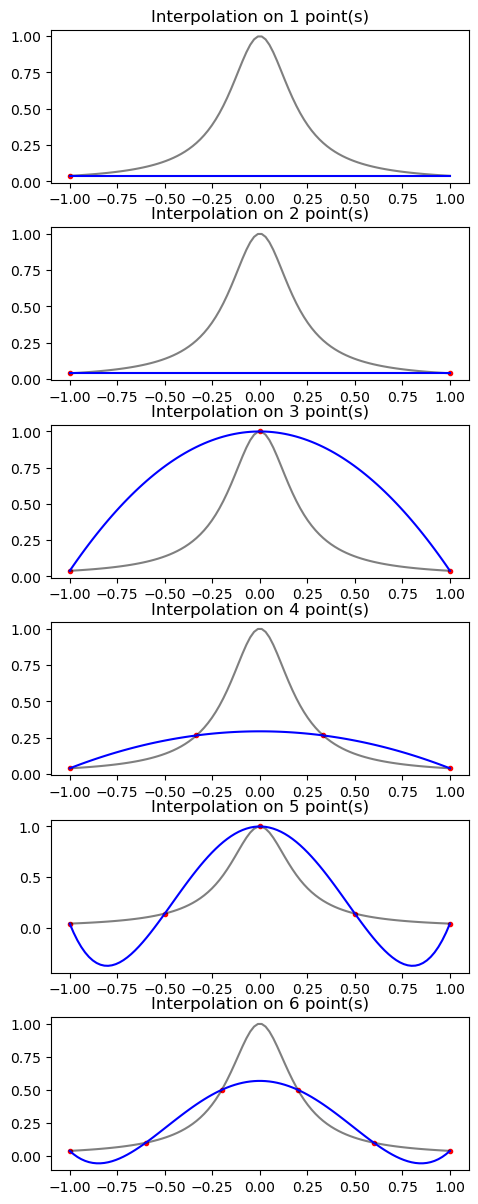

In [36]:
runge_demo(6)